<a href="https://colab.research.google.com/github/Sankalp96/Reinforcement-learning/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [50]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [51]:
import math
N=10000
d=10
ad_selected=[]
number_of_selections=[0]*d
sums_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if (number_of_selections[i]>0):
      average_reward=sums_of_rewards[i]/number_of_selections[i]
      delta_i=math.sqrt(((3/2)*math.log(n+1))/number_of_selections[i])
      upper_bound=average_reward+delta_i
    else:
      upper_bound=1e400
    if (upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i
  ad_selected.append(ad)
  number_of_selections[ad]+=1
  reward=dataset.values[n,ad]
  sums_of_rewards[ad]+=reward
  total_reward+=reward

## Visualising the results

Text(0, 0.5, 'Number of times each ad was selected')

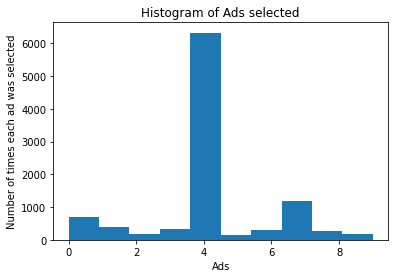

In [52]:
plt.hist(ad_selected)
plt.title("Histogram of Ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")